In [ ]:
import pandas as pd
import numpy as np
from skimage import transform
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

**LFM -LABELED FACES IN THE** **WILD Dataset**

The Labeled Faces in the Wild (LFW) dataset is a popular benchmark dataset for face recognition. It consists of more than 13,000 labeled images of faces collected from the web. Each face is labeled with the name of the person it belongs to, making it suitable for tasks like face verification, face identification, and facial attribute recognition

In [ ]:
#fetching the images and target names from lfw dataset

In [ ]:
lfw_people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)
x=lfw_people.images
y=lfw_people.target
target_names=lfw_people.target_names

In [ ]:
#preprocessing the images (here the images are rescaled and the differece between original and rescaled images are shown)

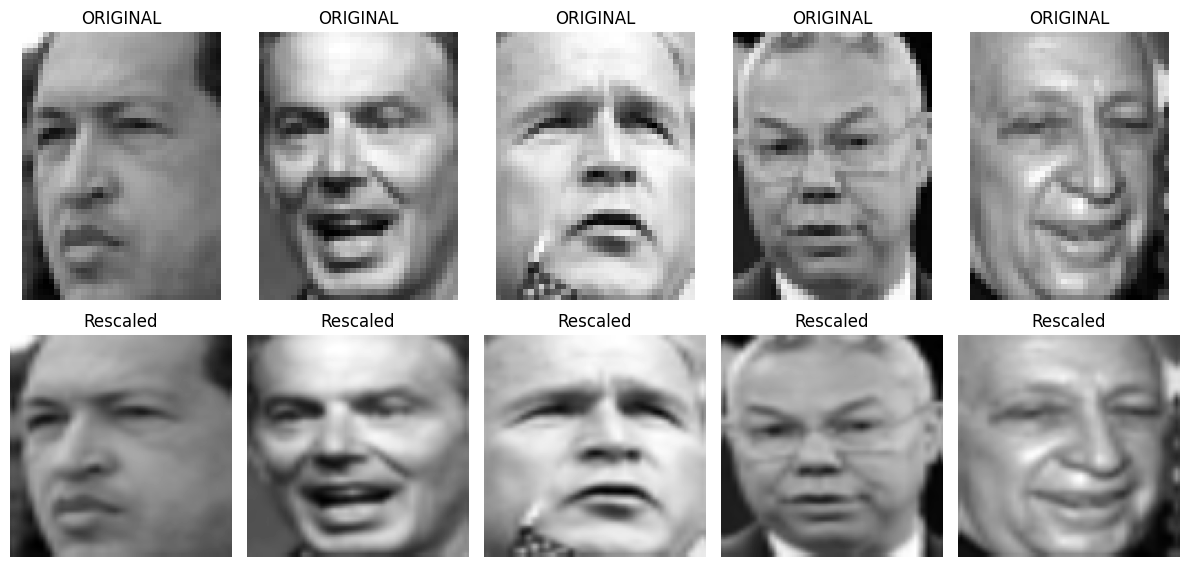

In [ ]:
X=[]
for image in x:
  rescaled_image=transform.resize(image,(100,100))
  X.append(rescaled_image)
X=np.array(X)
fig,axes=plt.subplots(2,5,figsize=(12,6))
for i in range(5):
  axes[0,i].imshow(x[i],cmap="gray")
  axes[0,i].axis("off")
  axes[0,i].set_title("ORIGINAL")
  axes[1,i].imshow(X[i],cmap="gray")
  axes[1,i].axis("off")
  axes[1,i].set_title("Rescaled")
plt.tight_layout()
plt.show()



In [ ]:
#spliting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
#importing the model

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()

In [ ]:
#training the model with the train data (since the input should be 2D ,the input x_train,x_test is reshaped)

In [ ]:
model.fit(x_train.reshape(len(x_train),-1),y_train)

SVC()

In [ ]:
#testing the model with test data

In [ ]:
y_pred=model.predict(x_test.reshape(len(x_test),-1))

In [ ]:
#model evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.14      0.25        28
           1       0.78      0.90      0.84        63
           2       0.75      0.50      0.60        24
           3       0.71      0.98      0.83       132
           4       0.58      0.35      0.44        20
           5       1.00      0.23      0.37        22
           6       0.86      0.76      0.81        33

    accuracy                           0.75       322
   macro avg       0.81      0.55      0.59       322
weighted avg       0.78      0.75      0.70       322



In [ ]:
#data visualization

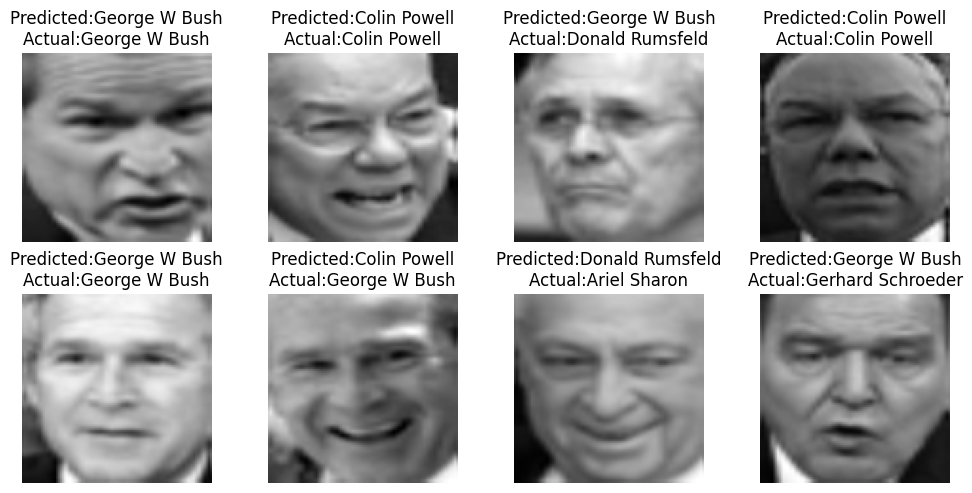

In [ ]:
plt.figure(figsize=(10,5))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.axis("off")
  plt.imshow(x_test[i],cmap="gray")
  plt.title(f"Predicted:{target_names[y_pred[i]]}\nActual:{target_names[y_test[i]]}")
plt.tight_layout()
plt.show()